<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

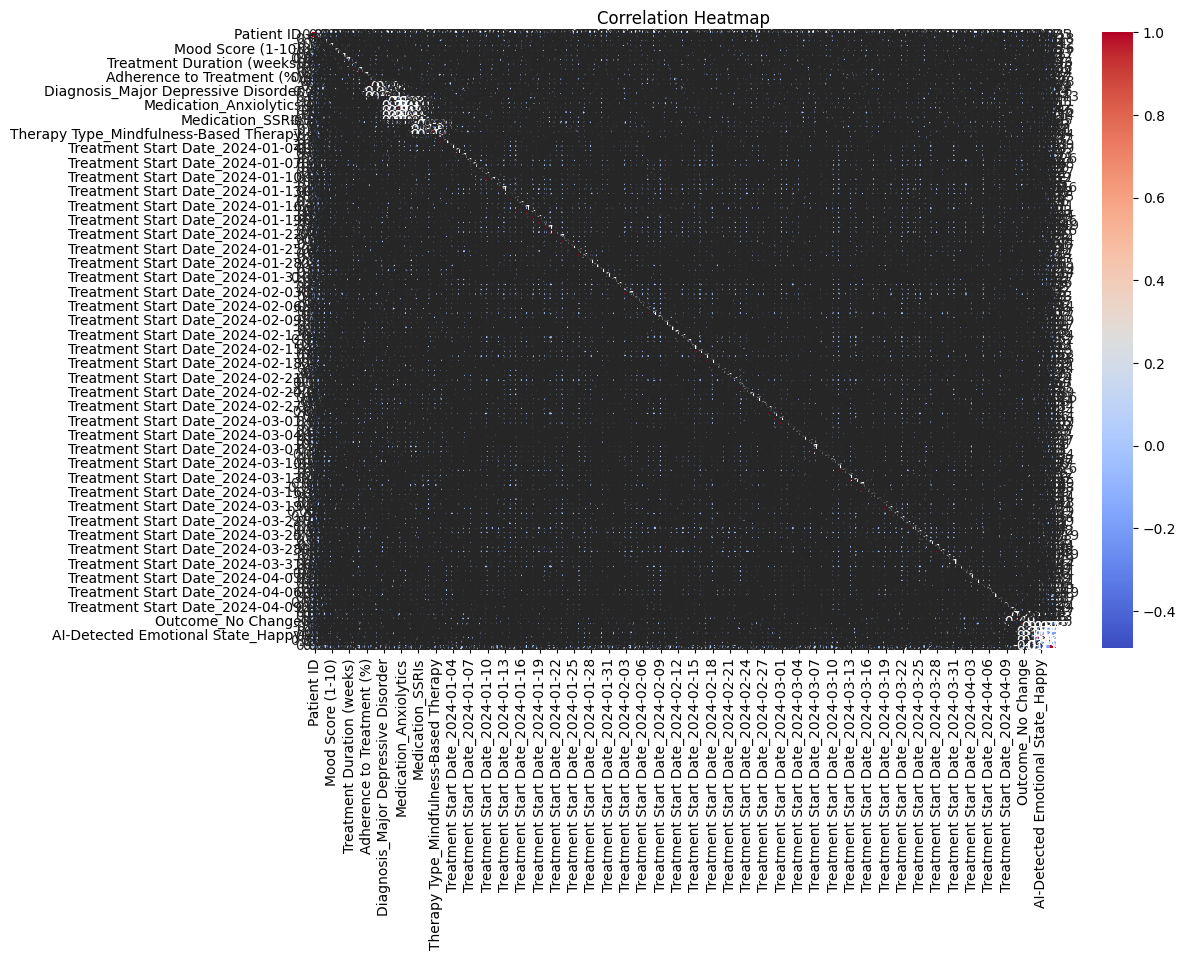

In [2]:
# Install libraries
!pip install pandas numpy matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

# Load the dataset (replace with the correct path or use Kaggle API to download directly)
df = pd.read_csv('mental_health_diagnosis_treatment_.csv')

# Basic Data Overview
print(df.info())
print(df.describe())
print("Missing values per column:\n", df.isnull().sum())

# Data Cleaning and Preprocessing
df.fillna(df.median(numeric_only=True), inplace=True)  # Example: fill missing values
df = pd.get_dummies(df, drop_first=True)  # Example: encoding categorical variables

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# D3.js Code for Interactive Visualization (e.g., Bar Chart)
d3_code = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>
  .bar { fill: steelblue; }
</style>
<svg width="800" height="500"></svg>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>
  var data = [10, 20, 30, 40, 50];  // Replace with actual data

  var svg = d3.select("svg"),
      margin = 200,
      width = svg.attr("width") - margin,
      height = svg.attr("height") - margin;

  svg.append("text")
     .attr("transform", "translate(100,0)")
     .attr("x", 50)
     .attr("y", 50)
     .attr("font-size", "24px")
     .text("Interactive Bar Chart");

  var xScale = d3.scaleBand().range([0, width]).padding(0.4),
      yScale = d3.scaleLinear().range([height, 0]);

  var g = svg.append("g")
             .attr("transform", "translate(" + 100 + "," + 100 + ")");

  xScale.domain(data.map(function(d, i) { return i; }));
  yScale.domain([0, d3.max(data, function(d) { return d; })]);

  g.append("g")
   .attr("transform", "translate(0," + height + ")")
   .call(d3.axisBottom(xScale));

  g.append("g")
   .call(d3.axisLeft(yScale).tickFormat(function(d){
       return d;
     }).ticks(10));

  g.selectAll(".bar")
   .data(data)
   .enter().append("rect")
   .attr("class", "bar")
   .attr("x", function(d, i) { return xScale(i); })
   .attr("y", function(d) { return yScale(d); })
   .attr("width", xScale.bandwidth())
   .attr("height", function(d) { return height - yScale(d); });
</script>
"""

# Display the D3 Visualization
HTML(d3_code)